# Mediciones de corriente continua

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.optimize import curve_fit
import pandas as pd

### Clase Medición

In [67]:
class Medicion(object):
    
    """
    Documentacion de la clase Medicion
    """
    
    def __init__(self):
        self.lectura_resistencia = np.NaN
        self.unidad_resistencia = np.NaN
        self.escala_resistencia = np.NaN
        self.lectura_amperimetro = np.NaN
        self.unidad_amperimetro = np.NaN
        self.escala_amperimetro = np.NaN   
        self.lectura_voltimetro = np.NaN
        self.unidad_voltimetro = np.NaN
        self.escala_voltimetro = np.NaN
        self.error_amperimetro = np.NaN
        self.error_voltimetro = np.NaN
        self.parametros = np.NaN
        self.matriz_var = np.NaN

    
    #funcion que me permite cargar los datos, se puede usar despues Medicion.cargar_resistencia(ponervalores)
    def cargar_resistencia(self, valores, unidad, escala):
        
        self.lectura_resistencia = valores
        self.unidad_resistencia = unidad
        self.escala_resistencia = escala
    
    def cargar_corriente(self, valores, unidad, escala):
        
        self.lectura_amperimetro = valores
        self.unidad_amperimetro = unidad
        self.escala_amperimetro = escala
        
    def cargar_voltaje(self, valores, unidad, escala):
        
        self.lectura_voltimetro = valores
        self.unidad_voltimetro = unidad
        self.escala_voltimetro = escala
        
    def cargar_error(self, eAmp, eVol):
        self.error_amperimetro = eAmp
        self.error_voltimetro = eVol
        
    def gen_df(self):
        
        self.datos = pd.DataFrame({
                'voltaje': self.lectura_voltimetro, 
                'corriente': self.lectura_amperimetro,
                'resistencia': self.lectura_resistencia})
        
    def cargar_parametros(self, param, var):
        self.parametros = param
        self.matriz_var = var
        

### Incerteza del multímetro

In [68]:
# x es la fracción porcentual (ver en manual)
# n es un número natural (ver en manual)
# dms es el dígito menos significativo (pantalla del multímetro)
# L es la lectura del multímetro (pantalla del multímetro)

def error_mult(x, L, n, dms):
    
    error = (x*L) + (n*dms)
    
    return error
    

## Medición resistencia interna del amperímetro

In [69]:
med1 = Medicion()
med1.cargar_corriente([1.950,1.812,1.691,1.636,1.538,1.450,1.330,1.181,1.104,1.016,0.941,0.876,0.819,0.770,0.726,0.669,0.627,0.559,0.504,0.458], 'mA', '2mA')
med1.cargar_voltaje([195.0,181.1,169.0,163.6,153.7,144.9,133.5,118.0,110.4,101.5,94.0,87.5,81.5,76.9,72.6,66.6,62.7,55.8,50.3,45.8], 'mV', '200mV')

error = list()
for i in range(len(med1.lectura_amperimetro)):
    error.append(error_mult(0.8/100, med1.lectura_amperimetro[i], 1, 0.001))
    
med1.cargar_error(error, np.NaN)

Defino una función lineal común:

In [71]:
def lineal(x, A, b):
    y = A*x + b
    return(y)

Ajuste:

In [91]:
params, var = curve_fit(lineal, med1.lectura_amperimetro, med1.lectura_voltimetro, p0=[1,0], sigma = med1.error_amperimetro)
med1.cargar_parametros(params, var)
print('Según el ajuste lineal realizado, la pendiente (y por lo tanto la resistencia del amperímetro) es: ', 
      med1.parametros[0],  ', y la ordenada al origen es:', med1.parametros[1], '. Los errores asociados son: ', 
      np.sqrt(np.diag(med1.matriz_var)))

Según el ajuste lineal realizado, la pendiente (y por lo tanto la resistencia del amperímetro) es:  100.04831944781702 , y la ordenada al origen es: -0.12088341676401236 . Los errores asociados son:  [0.09323704 0.08027086]


Gráfico:

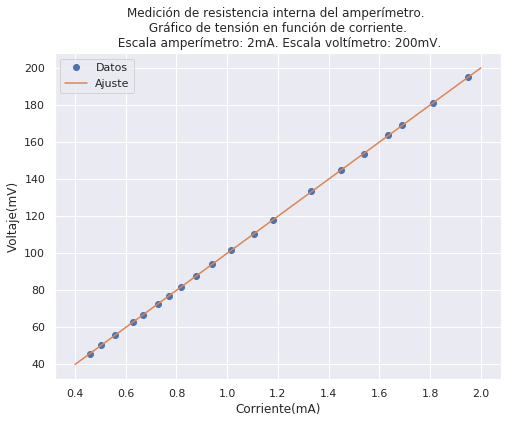

In [93]:
fig = plt.figure(figsize = [8,6])
plt.plot(med1.lectura_amperimetro, med1.lectura_voltimetro, 'o', label = 'Datos')
plt.plot(np.linspace(0.4, 2.0, 1000), lineal(np.linspace(0.4, 2.0, 1000), *med1.parametros), label = 'Ajuste')
plt.title('Medición de resistencia interna del amperímetro. \n Gráfico de tensión en función de corriente. \n Escala amperímetro: 2mA. Escala voltímetro: 200mV.')
plt.xlabel('Corriente(mA)')
plt.ylabel('Voltaje(mV)')
plt.legend()